# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [5]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# initial conditions

city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

i = 0
set = 1

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudiness_list.append(response['clouds']['all'])
        country_list.append(response['sys']['country'])
        date_list.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lat_list.append(response['coord']['lat'])
        lng_list.append(response['coord']['lon'])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response['wind']['speed'])
        
        if i > 48:
            i=1
            set+=1
            city_list.append(city)
      
        else:
            i+=1
            city_list.append(city)
        print(f"Processing Record {i} of Set {set}| {city}")
    except Exception:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        

Beginning Data Retrieval
-----------------------------

Processing Record 1 of Set 1| ushuaia
Processing Record 2 of Set 1| severo-kurilsk
Processing Record 3 of Set 1| east london
Processing Record 4 of Set 1| hermanus
Processing Record 5 of Set 1| jamestown
Processing Record 6 of Set 1| alofi
Processing Record 7 of Set 1| longyearbyen
Processing Record 8 of Set 1| castro
Processing Record 9 of Set 1| alexandria
Processing Record 10 of Set 1| springfield
Processing Record 11 of Set 1| khani
Processing Record 12 of Set 1| nanortalik
Processing Record 13 of Set 1| tasiilaq
Processing Record 14 of Set 1| timmins
Processing Record 15 of Set 1| lagoa
Processing Record 16 of Set 1| cidreira
Processing Record 17 of Set 1| punta arenas
Processing Record 18 of Set 1| tchibanga
Processing Record 19 of Set 1| saldanha
Processing Record 20 of Set 1| barrow
Processing Record 21 of Set 1| barrhead
City not found. Skipping...
Processing Record 22 of Set 1| nome
Processing Record 23 of Set 1| araouan

Processing Record 43 of Set 4| harper
Processing Record 44 of Set 4| hami
Processing Record 45 of Set 4| sao filipe
Processing Record 46 of Set 4| nerchinskiy zavod
Processing Record 47 of Set 4| haverfordwest
Processing Record 48 of Set 4| klaksvik
City not found. Skipping...
Processing Record 49 of Set 4| grindavik
Processing Record 1 of Set 5| arona
Processing Record 2 of Set 5| erenhot
Processing Record 3 of Set 5| bulalacao
Processing Record 4 of Set 5| soyo
Processing Record 5 of Set 5| lompoc
Processing Record 6 of Set 5| acapulco
Processing Record 7 of Set 5| nikolskoye
Processing Record 8 of Set 5| caravelas
City not found. Skipping...
Processing Record 9 of Set 5| klyuchi
Processing Record 10 of Set 5| chipinge
Processing Record 11 of Set 5| carmen
Processing Record 12 of Set 5| livani
Processing Record 13 of Set 5| lac du bonnet
Processing Record 14 of Set 5| juegang
Processing Record 15 of Set 5| vostok
City not found. Skipping...
Processing Record 16 of Set 5| kulhudhuffus

Processing Record 39 of Set 8| lewistown
Processing Record 40 of Set 8| marzuq
Processing Record 41 of Set 8| aykhal
Processing Record 42 of Set 8| shingu
Processing Record 43 of Set 8| upernavik
City not found. Skipping...
Processing Record 44 of Set 8| pocos de caldas
Processing Record 45 of Set 8| college
Processing Record 46 of Set 8| ambulu
Processing Record 47 of Set 8| katsuura
Processing Record 48 of Set 8| katangli
Processing Record 49 of Set 8| southbridge
Processing Record 1 of Set 9| arcata
Processing Record 2 of Set 9| yeppoon
Processing Record 3 of Set 9| hengyang
Processing Record 4 of Set 9| lotoshino
Processing Record 5 of Set 9| mananara
Processing Record 6 of Set 9| jasper
Processing Record 7 of Set 9| abu samrah
Processing Record 8 of Set 9| alyangula
Processing Record 9 of Set 9| sorland
Processing Record 10 of Set 9| huancabamba
Processing Record 11 of Set 9| balatonfuzfo
Processing Record 12 of Set 9| aswan
Processing Record 13 of Set 9| changde
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create a dictionary of list
city_data_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Wind Speed': wind_speed_list}

#  Create a dataframe

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.count()

City          531
Cloudiness    531
Country       531
Date          531
Humidity      531
Lat           531
Lng           531
Max Temp      531
Wind Speed    531
dtype: int64

In [7]:
# look at the first few rows of dataframe
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1596393517,75,-54.80,-68.30,41.00,24.16
1,severo-kurilsk,100,RU,1596393517,84,50.68,156.12,52.56,8.50
2,east london,0,ZA,1596393517,22,-33.02,27.91,72.57,8.46
3,hermanus,0,ZA,1596393518,72,-34.42,19.23,61.00,3.00
4,jamestown,90,US,1596393518,78,42.10,-79.24,73.99,18.34


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_data_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,531.000000,5.310000e+02,531.000000,531.000000,531.000000,531.000000,531.000000
mean,51.403013,1.596394e+09,68.969868,18.925330,16.445876,70.268625,7.922561
std,41.449168,7.177601e+01,21.392624,33.459212,92.310904,14.307609,5.002643
min,0.000000,1.596393e+09,5.000000,-54.800000,-179.170000,35.600000,0.510000
25%,2.000000,1.596394e+09,59.000000,-8.675000,-67.900000,59.000000,4.185000
50%,56.000000,1.596394e+09,74.000000,20.700000,19.130000,72.000000,6.930000
75%,97.000000,1.596394e+09,85.000000,48.115000,99.690000,80.600000,10.560000
max,100.000000,1.596394e+09,100.000000,78.220000,179.320000,108.430000,27.380000


In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

hi_humidity = city_data_df[city_data_df['Humidity'] > 100 ].index
clean_city_data_df = city_data_df.drop(hi_humidity, inplace=False)
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1596393517,75,-54.80,-68.30,41.00,24.16
1,severo-kurilsk,100,RU,1596393517,84,50.68,156.12,52.56,8.50
2,east london,0,ZA,1596393517,22,-33.02,27.91,72.57,8.46
3,hermanus,0,ZA,1596393518,72,-34.42,19.23,61.00,3.00
4,jamestown,90,US,1596393518,78,42.10,-79.24,73.99,18.34
...,...,...,...,...,...,...,...,...,...
526,kiunga,67,PG,1596393646,96,-6.12,141.29,69.80,2.19
527,bhikangaon,97,IN,1596393646,78,21.87,75.95,83.34,7.14
528,alice,0,US,1596393516,49,27.75,-98.07,91.40,8.68
529,genhe,100,CN,1596393646,92,50.78,121.52,62.04,8.95


In [11]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv

clean_city_data_df.to_csv("../output_data/cities.csv", index=False)
clean_city_data_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,40,AR,1596393517,75,-54.80,-68.30,41.00,24.16
1,severo-kurilsk,100,RU,1596393517,84,50.68,156.12,52.56,8.50
2,east london,0,ZA,1596393517,22,-33.02,27.91,72.57,8.46
3,hermanus,0,ZA,1596393518,72,-34.42,19.23,61.00,3.00
4,jamestown,90,US,1596393518,78,42.10,-79.24,73.99,18.34
...,...,...,...,...,...,...,...,...,...
526,kiunga,67,PG,1596393646,96,-6.12,141.29,69.80,2.19
527,bhikangaon,97,IN,1596393646,78,21.87,75.95,83.34,7.14
528,alice,0,US,1596393516,49,27.75,-98.07,91.40,8.68
529,genhe,100,CN,1596393646,92,50.78,121.52,62.04,8.95


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

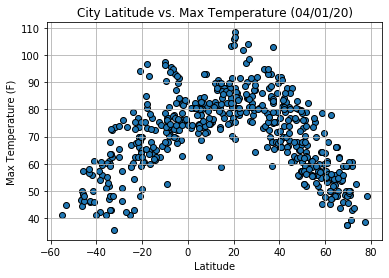

In [13]:
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.savefig('../Images/fig1.png')
plt.show()

## Latitude vs. Humidity Plot

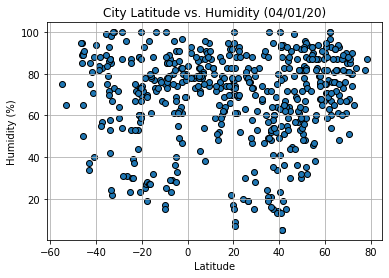

In [14]:
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.savefig('../Images/fig2.png')
plt.show()

## Latitude vs. Cloudiness Plot

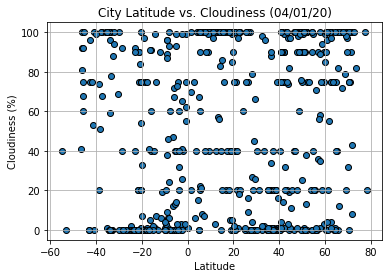

In [15]:
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.savefig('../Images/fig3.png')
plt.show()

## Latitude vs. Wind Speed Plot

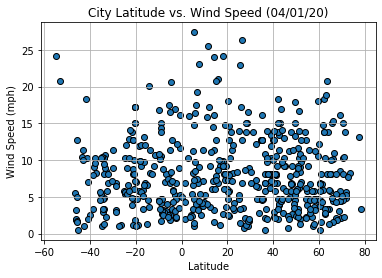

In [16]:
x_values = clean_city_data_df['Lat']
y_values = clean_city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.savefig('../Images/fig4.png')
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

In [20]:
# Create Northern and Southern Hemisphere DataFrames
north_hemis_df = clean_city_data_df.loc[clean_city_data_df['Lat'] > 0, :]
south_hemis_df = clean_city_data_df.loc[clean_city_data_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [21]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    print(f"The r-squared is: {rvalue}")
    plt.savefig('../Images/fig5.png')
    plt.show()

The r-squared is: -0.7079501884488961


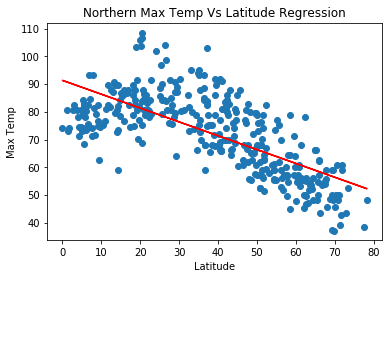

In [22]:
linear_reg_plot(north_hemis_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', '../Images/fig6.png', (10,0))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.726029466126774


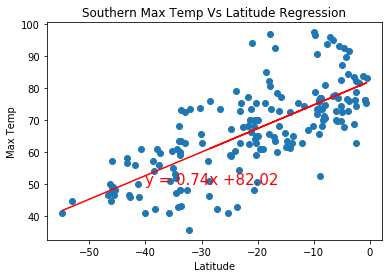

In [23]:
linear_reg_plot(south_hemis_df, "Southern Max Temp Vs Latitude Regression", "Max Temp", "Max Temp", '../Images/fig7.png', (-40,50))

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.05143843619282232


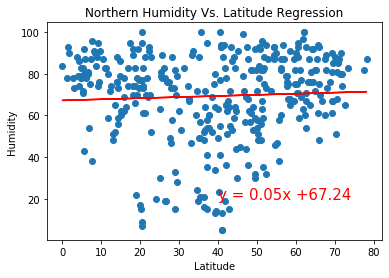

In [24]:
linear_reg_plot(north_hemis_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', '../Images/fig9.png', (40,20))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.09808185936877815


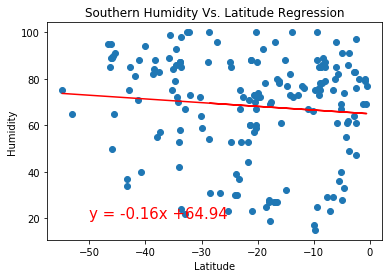

In [25]:
linear_reg_plot(south_hemis_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'Figures/fig8.png', (-50,20))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02920182190059131


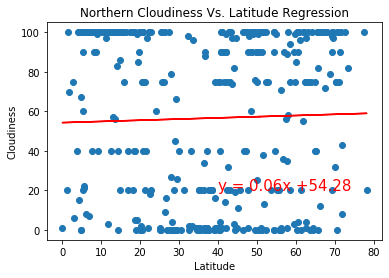

In [26]:
linear_reg_plot(north_hemis_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 
                '../Images/fig10.png', (40,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.17448622886372886


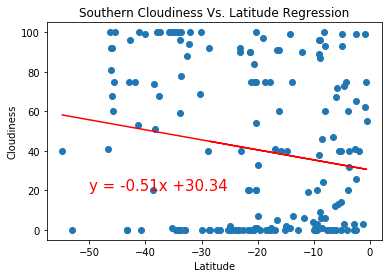

In [27]:
linear_reg_plot(south_hemis_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', '../Images/fig11.png', (-50,20))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.11392898485254217


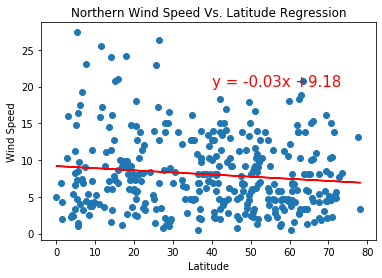

In [28]:
linear_reg_plot(north_hemis_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'Figures/fig11.png', (40,20))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.01612029463335857


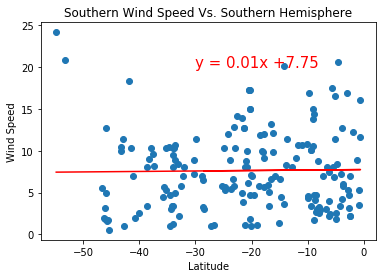

In [29]:
linear_reg_plot(south_hemis_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', '../Images/fig12.png', (-30,20))